In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Introduction

Notebook for resampling daily data to monthly frequency, and then carrying out exploratory stats to look for relationships between monthly-aggregated variables. By looking for relationships using monthly-aggregation rather than growing-season aggregation, this analysis highlights relationships that are important for controlling within-year variability as well as intra-annual variability.

Results are reported in Annex A of Jackson-Blake et al. (2022), HESS.

# User input

In [1]:
# File path to daily data
infpath = r'../Data/DataMatrices/Daily/Vansjø_daily_data_Van2_metno.csv'

# Folder to store output csv and plots
out_folder = r'../Data/Monthly_aggregation/'  # Current directory

met_source = 'metno'  # 'metno' or 'era5'
basin = 'Van2'  # 'Van1' or 'Van2'

# Read in daily data and resample to monthly frequency

In [4]:
# READ IN
daily_df = pd.read_csv(infpath, index_col=0, parse_dates=True, dayfirst=True)
daily_df.head()

,Pptn,Temp,Wind_speed,Q,TP_catch,chl-a_lake,TP_lake,colour_lake,CyanoBiovol,Rain_day,Pptn_intense,Wind_under_Q0.2,Wind_under_Q0.4,Wind_over_Q0.6,Wind_over_Q0.8,Temp_subzero
Date,,,,,,,,,,,,,,,,
1980-01-01,0.000000,-4.758278,2.9,4.252,NaN,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True
1980-01-02,0.000000,-8.821736,3.1,5.544,NaN,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True
1980-01-03,0.000000,-15.280719,1.5,8.203,NaN,NaN,NaN,NaN,NaN,0,0,True,True,False,False,True
1980-01-04,2.669136,-12.965066,1.7,10.461,NaN,NaN,NaN,NaN,NaN,1,0,True,True,False,False,True
1980-01-05,2.806878,-5.304253,1.5,10.239,NaN,NaN,NaN,NaN,NaN,1,0,True,True,False,False,True


In [5]:
# Set the aggregation method for different variables
vars_to_sum = ["Pptn", "Rain_day", "Pptn_intense", "Q", "Temp_subzero"]

# Add wind cols to vars to sum
wind_cols = []
calm_quantiles = [0.2, 0.4]
windy_quantiles = [0.6, 0.8]
for q in calm_quantiles:
    wind_cols.append("Wind_under_Q%s" % q)
for q in windy_quantiles:
    wind_cols.append("Wind_over_Q%s" % q)
vars_to_sum += wind_cols

vars_to_average = [
    "TP_catch",
    "PTI",
    "Temp",
    "Biovolume",
    "rel_res_time",
    "colour_lake",
    "TP_lake",
    "Wind_speed",
]

vars_to_max = ["CyanoBiovol", "chl-a_lake"]

agg_method_dict = {}  # Key: var, returns aggregation method
for var in daily_df.columns:
    if var in vars_to_sum:
        method = np.sum
    elif var in vars_to_average:
        method = np.nanmean
    elif var in vars_to_max:
        method = np.nanmax
    else:
        method = None
    agg_method_dict[var] = method

In [7]:
monthly_df = daily_df.resample('M').agg(agg_method_dict)

# Summing gives 0 for vars where the whole month was NaNs. Replace with NaN
for sum_var in ["Q", "Pptn"]:
    monthly_df.loc[monthly_df[sum_var] == 0.0, sum_var] = np.NaN

monthly_df.head()

,Pptn,Temp,Wind_speed,Q,TP_catch,chl-a_lake,TP_lake,colour_lake,CyanoBiovol,Rain_day,Pptn_intense,Wind_under_Q0.2,Wind_under_Q0.4,Wind_over_Q0.6,Wind_over_Q0.8,Temp_subzero
Date,,,,,,,,,,,,,,,,
1980-01-31,22.125336,-6.757972,2.319355,70.546,NaN,NaN,NaN,NaN,NaN,5,0,14,17,5,2,31
1980-02-29,32.912846,-7.809669,2.403448,5.184,NaN,NaN,NaN,NaN,NaN,5,1,13,17,5,3,27
1980-03-31,35.959196,-2.712113,3.122581,10.608,NaN,NaN,NaN,NaN,NaN,5,1,8,10,9,3,24
1980-04-30,11.020521,5.377126,3.576667,310.798,130.0,3.971429,45.250000,NaN,NaN,4,0,5,10,11,3,0
1980-05-31,51.422606,12.248917,3.383871,132.962,50.0,12.614286,38.857143,NaN,NaN,8,2,2,11,10,3,0


<AxesSubplot:xlabel='Date'>

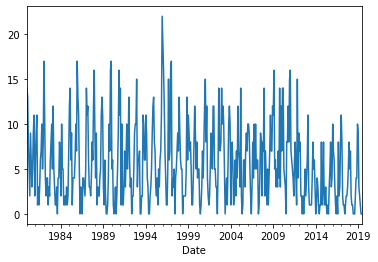

In [8]:
monthly_df['Wind_under_Q0.2'].plot()

## Add lagged variables

In [60]:
# For all variables, add 1 month lag
for var in monthly_df.columns:
    monthly_df["%s_lag1M" % var] = monthly_df[var].shift(+1)

# Add a column for the month
monthly_df["Month"] = monthly_df.index.month

monthly_df[["chl-a_lake", "TP_catch", "TP_catch_lag1M"]].head()

,chl-a_lake,TP_catch,TP_catch_lag1M
Date,,,
1980-01-31,NaN,NaN,NaN
1980-02-29,NaN,NaN,NaN
1980-03-31,NaN,NaN,NaN
1980-04-30,3.971429,130.0,NaN
1980-05-31,9.948810,50.0,130.0


In [11]:
# Means or sums of previous 2-3 months of except the lake vars.
# For the lake variables, the seasonal sampling (only April or May to Sep or Oct) means this
# lagging introduces too many missing values for the analysis

for var in vars_to_sum:
    for months in [2, 3, 4, 5, 6]:
        # First, shift one place so is lagged, then aggregate
        lagged_col = monthly_df[var].shift(+1)
        roll_sum = lagged_col.rolling(months, min_periods=months, closed="right").sum()
        monthly_df["%s_lag%sM_sum" % (var, months)] = roll_sum

# Replave vars_to_average with just non-lake vars, i.e.
for var in ["TP_catch", "Temp", "Q"]:
    for months in [2, 3]:
        # First, shift one place so is lagged, then aggregate
        lagged_col = monthly_df[var].shift(+1)
        roll_mean = lagged_col.rolling(
            months, min_periods=months, closed="right"
        ).mean()
        monthly_df["%s_lag%sM_av" % (var, months)] = roll_mean

monthly_df[["Rain_day", "Rain_day_lag2M_sum", "Rain_day_lag3M_sum"]].head()

,Rain_day,Rain_day_lag2M_sum,Rain_day_lag3M_sum
Date,,,
1980-01-31,5,NaN,NaN
1980-02-29,5,NaN,NaN
1980-03-31,5,10.0,NaN
1980-04-30,4,10.0,15.0
1980-05-31,8,9.0,14.0


## Add values for the previous winter and summer

In [19]:
# For all variables that are summed on aggregating, calculate the sum for the
# previous winter (October - March)

# First, add a 'season_2' column, splitting data into 'winter' (Oct-March) and 'summer' (Apr-Sep)
# N.B. October lake sampling in 'winter' then
def growing_season(month):
    if month < 4 or month > 9:
        return 0
    else:
        return 1


monthly_df["season_2"] = monthly_df.index.month.map(growing_season)

# Then filter to just winter and calculate winter sums per year
wint_sum_df = monthly_df.loc[monthly_df["season_2"] == 0, vars_to_sum]

# Need to take account of fact that one season spans two years
wint_sum_df = wint_sum_df.iloc[3:]  # Drop first 3 values, as only half a season
# Make series of years to sum over (e.g. Oct-Mar of yr-1 to yr)
yr_li = []
for yr in range(1981, 2020):
    a = 6 * [yr]
    yr_li.extend(a)
wint_sum_df["sum_yr"] = yr_li

# Group by years and work out number of months with obs (for filtering
# out years where don't have enough months with obs). And sum!
wint_sum_df_counts = wint_sum_df.groupby("sum_yr").count()
wint_sum_df = wint_sum_df.groupby("sum_yr").sum()

# Add 1980, though it's NaN, for compatibility with monthly df
wint_sum_df.loc[1980] = len(wint_sum_df.columns) * [np.NaN]
wint_sum_df.sort_index(inplace=True)

for var in vars_to_sum:
    monthly_df["%s_winterSum" % var] = monthly_df[var].index.year.map(
        lambda x: wint_sum_df.loc[x, var]
    )

# print monthly_df.loc['1981':'1982',['Rain_day','Rain_day_winterSum']]

In [23]:
# Add mean for previous summer for in-lake ecol variables

prev_summ_vars = [
    "chl-a_lake",
    "TP_lake",
    "CyanoBiovol",
]


# First, RESAMPLE TO SEASONAL
# Define 2 seasons per year, as in 6-month growing season
def season(x):
    """Input month number, and return the season it corresponds to"""
    if x in [11, 12, 1, 2, 3, 4]:
        return "wint"
    else:
        return "summ"


monthly_df["Season"] = monthly_df.index.month.map(season)

# Resample (enter 'Q' for quarterly, and '-month' for month to end in)
# N.B. if you change season function, need to change this too
season_df = daily_df.resample("2Q-Apr", closed="left").agg(agg_method_dict)
season_df["Season"] = season_df.index.month.map(season)

# Map season from previous year to values in current year for summer months
summer_df = season_df.loc[season_df["Season"] == "summ", prev_summ_vars]
summer_df["Year+1"] = summer_df.index.year + 1

for var in prev_summ_vars:
    for idx in monthly_df.index:
        # First year with data is 1980, so no values for previous year. In this case, add NaNs
        if idx.year < 1981:
            prev_summer_val = np.nan
        else:
            prev_summer_val = summer_df[var].loc[summer_df["Year+1"] == idx.year].values

        monthly_df.loc[idx, "%s_prevSummer" % var] = prev_summer_val


monthly_df[
    ["TP_lake", "TP_lake_prevSummer"]
].head(13)

,TP_lake,TP_lake_prevSummer
Date,,
1980-01-31,NaN,NaN
1980-02-29,NaN,NaN
1980-03-31,NaN,NaN
1980-04-30,45.250000,NaN
1980-05-31,38.857143,NaN
1980-06-30,32.633333,NaN
1980-07-31,36.761905,NaN
1980-08-31,67.400000,NaN
1980-09-30,33.857143,NaN


# Split into separate matrices for the 4 possible response variables and look at correlation coefficients

In [100]:
sorted(monthly_df.columns)

['Biovolume',
 'Biovolume_lag1M',
 'CyanoBiovol',
 'CyanoBiovol_lag1M',
 'CyanoBiovol_prevSummer',
 'Month',
 'PET',
 'PET_lag1M',
 'PET_lag2M_sum',
 'PET_lag3M_sum',
 'PET_lag4M_sum',
 'PET_lag5M_sum',
 'PET_lag6M_sum',
 'PET_winterSum',
 'PTI',
 'PTI_lag1M',
 'Pptn',
 'Pptn_intense',
 'Pptn_intense_lag1M',
 'Pptn_intense_lag2M_sum',
 'Pptn_intense_lag3M_sum',
 'Pptn_intense_lag4M_sum',
 'Pptn_intense_lag5M_sum',
 'Pptn_intense_lag6M_sum',
 'Pptn_intense_winterSum',
 'Pptn_lag1M',
 'Pptn_lag2M_sum',
 'Pptn_lag3M_sum',
 'Pptn_lag4M_sum',
 'Pptn_lag5M_sum',
 'Pptn_lag6M_sum',
 'Pptn_winterSum',
 'Q',
 'Q_lag1M',
 'Q_lag2M_av',
 'Q_lag3M_av',
 'Rain_day',
 'Rain_day_lag1M',
 'Rain_day_lag2M_sum',
 'Rain_day_lag3M_sum',
 'Rain_day_lag4M_sum',
 'Rain_day_lag5M_sum',
 'Rain_day_lag6M_sum',
 'Rain_day_winterSum',
 'Season',
 'TP_catch',
 'TP_catch_lag1M',
 'TP_catch_lag2M_av',
 'TP_catch_lag3M_av',
 'TP_lake',
 'TP_lake_lag1M',
 'TP_lake_prevSummer',
 'TP_van1',
 'TP_van1_lag1M',
 'TP_van1_p

## Response var = lake TP concentration

In [101]:
# First, lake TP concentration is the explanatory variable.
# So drop all ecological-related stuff. Biol could use up P, and therefore have
# a negative relationship with TP. But correlations are all positive (i.e.
# relationship seems to be mostly the other way around), so remove for
# simplicity. Also drop relative residence time, as it's a function of Q, and
# not looking particularly important compared to Q

cols_to_drop = [
 'Biovolume',
 'Biovolume_lag1M',
#  'Biovolume_lag2M_av',
#  'Biovolume_lag3M_av',
 'chl-a_lake',
 'chl-a_lake_lag1M',
#  'chl-a_lake_lag2M_av',
#  'chl-a_lake_lag3M_av',
 'chl-a_lake_prevSummer',
 'colour_lake',
 'colour_lake_lag1M',
#  'colour_lake_lag2M_av',
#  'colour_lake_lag3M_av', 
 'CyanoBiovol',
 'CyanoBiovol_lag1M',
#  'CyanoBiovol_lag2M_av',
#  'CyanoBiovol_lag3M_av',
 'CyanoBiovol_prevSummer',
 'PTI',
 'PTI_lag1M',
#  'PTI_lag2M_av',
#  'PTI_lag3M_av',
 'status_CyanoBiovol',
 'status_CyanoBiovol_lag1M',
 'status_CyanoBiovol_prevSummer',
 'status_chl-a_lake',
 'status_chl-a_lake_lag1M',
 'status_chl-a_lake_prevSummer',
 'status_TP_lake',
 'status_TP_lake_lag1M',
 'status_TP_lake_prevSummer']
#  'rel_res_time',
#  'rel_res_time_lag1M',
#  'rel_res_time_lag2M_av',
#  'rel_res_time_lag3M_av',

if basin == 'Van2':
    extra_cols_to_drop = [
    'chl-a_van1',
    'chl-a_van1_lag1M',
#     'chl-a_van1_lag2M_av',
#     'chl-a_van1_lag3M_av',
    'chl-a_van1_prevSummer',
    'colour_van1',
    'colour_van1_lag1M',
#     'colour_van1_lag2M_av',
#     'colour_van1_lag3M_av'
    ]
    cols_to_drop = cols_to_drop+extra_cols_to_drop

monthly_df_lakeTP = monthly_df.drop(cols_to_drop,axis=1)
print (len(monthly_df_lakeTP))

# Drop any rows where TP_lake is a NaN
monthly_df_lakeTP.dropna(subset=['TP_lake'], inplace=True)
print (len(monthly_df_lakeTP))
monthly_df_lakeTP.head()

462
198


,Pptn,Temp,Wind_speed,PET,Q,TP_catch,TP_lake,TP_van1,rel_res_time,Rain_day,...,TP_catch_lag3M_av,Temp_lag2M_av,Temp_lag3M_av,Q_lag2M_av,Q_lag3M_av,rel_res_time_lag2M_av,rel_res_time_lag3M_av,Season,TP_lake_prevSummer,TP_van1_prevSummer
Date,,,,,,,,,,,,,,,,,,,,,
1980-04-30,10.553205,4.218885,3.576667,34.443102,10.717172,130.0,45.250000,53.559028,0.168976,10,...,NaN,-6.596171,-7.094574,0.355697,1.620386,2.973641,2.097454,spr,NaN,NaN
1980-05-31,59.362142,11.237943,3.383871,89.630433,4.432067,50.0,38.857143,67.075000,0.287349,12,...,NaN,0.108739,-2.991152,5.541483,3.809522,1.553389,2.038752,spr,NaN,NaN
1980-06-30,131.738069,15.539921,3.016667,122.847223,4.893233,80.0,32.633333,24.444444,0.264810,25,...,NaN,7.728414,3.818473,7.574620,5.171677,0.228162,1.131376,summ,NaN,NaN
1980-07-31,51.099007,16.605522,2.900000,129.314046,3.487091,75.0,36.761905,22.888889,0.435075,26,...,86.666667,13.388932,10.332250,4.662650,6.680824,0.276079,0.240378,summ,NaN,NaN
1980-08-31,96.991814,14.394161,3.141935,101.334177,1.856323,70.0,67.400000,20.345238,0.785827,24,...,68.333333,16.072722,14.461129,4.190162,4.270797,0.349942,0.329078,summ,NaN,NaN


In [102]:
missing_data(monthly_df_lakeTP).head(15)

,N_missing,N_data,percent_missing
Q_lag3M_av,47,151,0.237374
rel_res_time_lag3M_av,47,151,0.237374
Q_lag2M_av,44,154,0.222222
rel_res_time_lag2M_av,44,154,0.222222
Q_lag1M,41,157,0.207071
rel_res_time_lag1M,41,157,0.207071
Q,40,158,0.202020
rel_res_time,40,158,0.202020
TP_van1_lag1M,39,159,0.196970
TP_lake_lag1M,39,159,0.196970


In [103]:
# Take a look at what's missing
# First, drop any columns which don't have NaNs, then plot
# monthly_df_lakeTP.loc[:, monthly_df_lakeTP.isna().any()].plot(subplots=True, figsize=(12,30))

In [104]:
X = monthly_df_lakeTP.drop(['TP_lake'],axis=1)
y = monthly_df_lakeTP['TP_lake']
corr_df = X.corrwith(y)

corr_df.sort_values()

Wind_over_Q0.9_winterSum    -0.219525
Wind_over_Q0.5_winterSum    -0.212072
Wind_over_Q0.6_winterSum    -0.210361
Wind_over_Q0.5_lag6M_sum    -0.200332
Wind_over_Q0.7_winterSum    -0.189707
Wind_over_Q0.8_lag6M_sum    -0.181722
Wind_over_Q0.8_winterSum    -0.168603
Wind_over_Q0.5_lag5M_sum    -0.163672
Wind_over_Q0.7_lag6M_sum    -0.162814
Pptn_intense_lag1M          -0.159657
Wind_over_Q0.6_lag6M_sum    -0.156682
Wind_over_Q0.9_lag6M_sum    -0.155214
Wind_over_Q0.8_lag5M_sum    -0.144778
Wind_over_Q0.8_lag1M        -0.140184
Wind_over_Q0.6              -0.137668
Wind_over_Q0.8_lag2M_sum    -0.131736
Wind_over_Q0.5_lag4M_sum    -0.126503
Month                       -0.121309
Wind_over_Q0.7_lag5M_sum    -0.121258
Wind_over_Q0.6_lag5M_sum    -0.120127
Pptn_intense_lag2M_sum      -0.118566
Wind_over_Q0.9_lag5M_sum    -0.112199
Pptn_intense_lag3M_sum      -0.108549
Wind_speed                  -0.106528
Wind_over_Q0.7              -0.104577
Wind_over_Q0.8_lag4M_sum    -0.100517
Wind_over_Q0

In [105]:
monthly_df_lakeTP.to_csv(os.path.join(out_file,'dataMatrix_monthly_TP_%s.csv'%basin), index_label='Date')

### Interpretation

Van 2 (Vanemfjorden):
- Strongest correlation is with lake SS conc (0.49), unsurprising as lots of TP is particulate P, and also because the same processes control them (catch input and resuspension). Not an explanatory variable though, so drop.
- by far the best potential explanatory variables are lake TP concentration from the previous 1-3 months, then the previous summer (correlation coefficients 0.3 to 0.5).
- TP concentration in Storefjorden (Van1) potentially exerts some influence (0.3), or just controlled by similar factors
- Wind effect is also quite apparent: the calmer the previous winter/2-6 months (number of days when wind speed under Q0.2-0.3), the higher the TP (CCs 0.26 and lower)
  conversely, the windier the previous winter/6 months (number of days when wind speed >Q0.9 or 0.5), the lower the TP (CCs about -0.2). What is going on here? Less wind -> more TP, i.e. it's not resuspension (that would be more wind -> more TP). So must instead be related to mixing of the water column? i.e. less wind, have more TP accumulation at the surface? The time lag is interesting though, it seems to be the winter wind effect that is most important, or at least the previous 6 months, rather than the previous month. Suggests a longer-term effect. Could be related to ice cover then? Calmer -> earlier ice development and more stable -> ...?
- Everything else much weaker (ccs less than 0.16).
- **No link to air T seen, unlike Storefjorden**. Because it's shallower?
- No relation with met variables relating to delivery. Suggesting internal processing and P sources are more important?

Van 1 (Storefjorden): (N.B. not re-run with wind vars included)
- Strong negative correlation with air temperature the previous month (up to -0.6) & lags, month
- Strong positive correlation with lake TP previous month (0.6), and lags
- Weaker but still pretty ok +ve correlations (around 0.35-0.45): Q & Q-1M, rain days over past 5-6 months, TP fluxes (4-6M), Pptn sum (6M)
- (though small -ve correlations with e.g. rain days, intense pptn days and pptn in the current month...)
- Lake colour positively correlated to lake TP (cc ~0.5)

i.e. Storefjorden shows much stronger relationship to temp and precipitation. Why such a strong negative relationship with air temperature?! Warmer = lower lake TP. Due to biol using it up? But correlation with chl-a is weaker (-0.3), biovol weaker still (-0.2). Most likely due to **stratification**? Warmer=stable, stratified waters that are depleted in P, versus mixing and more P-rich waters in winter??

Unlike Vanemfjorden, Storefjorden TP conc also potentially influenced by catchment inputs over last few months. Suggests perhaps that delivery is more important than internal processing here, whilst internal fluxes swamp delivery signal in Vanemfjorden? 

## Response var = Lake chl-a concentration

In [106]:
# 2) chl-a concentration
# cols to drop:
cols_to_drop = ['Biovolume',
 'Biovolume_lag1M',
#  'Biovolume_lag2M_av',
#  'Biovolume_lag3M_av',
 'CyanoBiovol',
 'CyanoBiovol_lag1M',
#  'CyanoBiovol_lag2M_av',
#  'CyanoBiovol_lag3M_av',
 'CyanoBiovol_prevSummer',
 'PTI',
 'PTI_lag1M',
#  'PTI_lag2M_av',
#  'PTI_lag3M_av',
 'rel_res_time',
 'rel_res_time_lag1M',
 'rel_res_time_lag2M_av',
 'rel_res_time_lag3M_av',
 'status_CyanoBiovol',
 'status_CyanoBiovol_lag1M',
 'status_CyanoBiovol_prevSummer',
 'status_TP_lake',
 'status_TP_lake_lag1M',
 'status_TP_lake_prevSummer',
 'status_chl-a_lake',
 'status_chl-a_lake_lag1M',
 'status_chl-a_lake_prevSummer'
               ]

monthly_df_lake_chla = monthly_df.drop(cols_to_drop,axis=1)
print (len(monthly_df_lake_chla))

# Drop any rows where explanatory variable value is a NaN
monthly_df_lake_chla.dropna(subset=['chl-a_lake'], inplace=True)
print (len(monthly_df_lake_chla))
# monthly_df_lake_chla.head()

462
202


In [107]:
X = monthly_df_lake_chla.drop(['chl-a_lake'],axis=1)
y = monthly_df_lake_chla['chl-a_lake']
corr_df = X.corrwith(y)
corr_df.sort_values()

Q_lag1M                     -0.386850
TP_van1                     -0.357043
Q                           -0.356612
Wind_under_Q0.1_lag3M_sum   -0.325854
Wind_under_Q0.1_lag2M_sum   -0.314300
Wind_under_Q0.2_lag3M_sum   -0.303631
Q_lag2M_av                  -0.298473
Wind_over_Q0.9              -0.298409
Wind_under_Q0.1_lag4M_sum   -0.286841
Wind_under_Q0.2_lag2M_sum   -0.277157
Wind_over_Q0.8              -0.274945
Wind_under_Q0.2_lag4M_sum   -0.269578
Wind_over_Q0.9_lag5M_sum    -0.260097
Wind_over_Q0.9_lag4M_sum    -0.259826
Wind_over_Q0.9_lag1M        -0.244462
Wind_speed                  -0.243500
Wind_under_Q0.3_lag3M_sum   -0.240656
Wind_over_Q0.9_lag2M_sum    -0.240392
TP_van1_lag1M               -0.239931
Wind_over_Q0.7_winterSum    -0.239643
Wind_over_Q0.9_lag3M_sum    -0.238593
Wind_over_Q0.9_lag6M_sum    -0.233229
Wind_under_Q0.3_lag2M_sum   -0.231686
colour_van1                 -0.227215
Wind_over_Q0.7              -0.218510
Wind_over_Q0.8_lag1M        -0.215040
Wind_under_Q

**Comments:**
Van2:
* Strongest correlations are with chl-a concentration in van1 (cc 0.63), chl-a concentration in lake in the previous month, followed closely by PET_lag1M (0.56), temperature (0.54), and then related variables lagged temp, PET and and chl-a, including chl-a from previous summer (0.35). Lake TP concentration in current month after that (0.32), then various lagged versions of it.
* Negative relationship with Q (-0.39, and therefore TP flux)! Because Q flushes chl-a away? Or because Q proportional to -PET and irradiance? Bigger CC than Lake TP concentration CC. i.e. important. Also negative with TP conc in van1, but probably because both chl-a and TP_van1 are controlled by temperature
* Wind: more calm days the previous 2-3 months means lower chl-a (CCs -0.33) (opposite of what I'd expect... stable water column should be more favourable for algal growth?)

i.e. key factors look likely to be chl-a_lake_lag1M, PET (integrates solar radiation variation due to time of year and temp, so should probably add solar radiation in?), Temp (and related lags), Q_lag1M, chl-a_lake_prevSummer, TP_lake. Likely that chl-a_van1 actually exerts a control on chl-a in van2? Or just that they respond similarly to the same drivers?

Van1:
* Positive: most important are temp (and then lags), chl-a_lag1M. Perhaps colour too (lagged)
* Negative: weaker but probably significant correlations with Q, TP_lake and TP_flux in current month (around -0.3). Negative relation with TP_lake!!! But because of strong positive relationship between chl-a and temperature, and strong negative relationship between TP_lake and temp (see above), rather than because the two are linked. i.e. have stratified warm, low-TP summer waters with high chl-a.

i.e. similar drivers to van2.

In [108]:
monthly_df_lake_chla.to_csv(os.path.join(out_file,'dataMatrix_monthly_Chl-a_%s.csv'%basin), index_label='Date')

## Response var = cyanobacterial biovolume

In [109]:
# cols to drop:
cols_to_drop = ['Biovolume',
 'Biovolume_lag1M',
#  'Biovolume_lag2M_av',
#  'Biovolume_lag3M_av',
 'PTI',
 'PTI_lag1M',
#  'PTI_lag2M_av',
#  'PTI_lag3M_av',
 'rel_res_time',
 'rel_res_time_lag1M',
 'rel_res_time_lag2M_av',
 'rel_res_time_lag3M_av',
 'status_CyanoBiovol',
 'status_CyanoBiovol_lag1M',
 'status_CyanoBiovol_prevSummer',
 'status_TP_lake',
 'status_TP_lake_lag1M',
 'status_TP_lake_prevSummer',
 'status_chl-a_lake',
 'status_chl-a_lake_lag1M',
 'status_chl-a_lake_prevSummer'
               ]

monthly_df_cyano = monthly_df.drop(cols_to_drop,axis=1)
print (len(monthly_df_cyano))

# Drop any rows where explanatory var value is a NaN
monthly_df_cyano.dropna(subset=['CyanoBiovol'], inplace=True)
print (len(monthly_df_cyano))
# monthly_df_lake_chla.head()

462
125


In [110]:
X = monthly_df_cyano.drop(['CyanoBiovol'],axis=1)
y = monthly_df_cyano['CyanoBiovol']
corr_df = X.corrwith(y)
corr_df.sort_values()

colour_van1                 -0.633166
colour_van1_lag1M           -0.629307
colour_lake                 -0.546776
colour_lake_lag1M           -0.539829
TP_van1                     -0.406118
Wind_over_Q0.5_winterSum    -0.360999
Wind_over_Q0.6_winterSum    -0.350206
Q_lag2M_av                  -0.342923
Q_lag1M                     -0.332551
Wind_over_Q0.7_winterSum    -0.311660
TP_van1_lag1M               -0.302799
Wind_speed                  -0.292152
Wind_over_Q0.8_winterSum    -0.286680
Q_lag3M_av                  -0.274636
Wind_over_Q0.8              -0.243055
PET_winterSum               -0.238516
Q                           -0.230677
Wind_over_Q0.9_lag6M_sum    -0.229287
Wind_over_Q0.7              -0.227013
Wind_over_Q0.9_lag5M_sum    -0.226689
Wind_over_Q0.5              -0.225104
Wind_over_Q0.9_winterSum    -0.219947
Pptn_lag6M_sum              -0.218959
Wind_under_Q0.2_lag3M_sum   -0.212106
Wind_under_Q0.3_lag3M_sum   -0.211503
Wind_over_Q0.8_lag1M        -0.192703
Wind_over_Q0

**Comments:**

VAN2:
- Strong positive correlations with cyanobiovol value previous 1-3 months, current chl-a, and cyanobiovol from previous summer.
- Strong negative correlation with lake colour from current and previous 1-3 months, for van2 and van1. i.e. higher colour means lower cyanobacteria (light limitation?). Why isn't this effect seen for chl-a? Especially given the strong correlation with chl-a (0.73)
- Evidence for a wind effect, but it's winter wind: the calmer the previous winter, the higher the summer cyanobiovol (ccs of 0.5 or lower, depending on the wind quantile). 

VAN1:
- Similar to Van2 in terms of positive corrlelations
- Unlike Van2, no strong negative correlation with lake colour. Strongest -ve is with TP_lake (but see comments about chl-a above)
- i.e. key predictors are probably chl-a and cyanobiovol from previous month

Why the strong correlation with colour in van2, but not in van1? Because van1 has a much smaller gradient in cyanobiovol, so don't reach light limitation because other things are limiting?

In [127]:
monthly_df_cyano.to_csv(os.path.join(out_file,'dataMatrix_monthly_CyanoBiovol_%s.csv'%basin), index_label='Date')

## Response var = Lake colour

In [112]:
# Drop all ecological-related stuff

cols_to_drop = [
 'Biovolume',
 'Biovolume_lag1M',
#  'Biovolume_lag2M_av',
#  'Biovolume_lag3M_av',
 'chl-a_lake',
 'chl-a_lake_lag1M',
#  'chl-a_lake_lag2M_av',
#  'chl-a_lake_lag3M_av',
 'chl-a_lake_prevSummer',
#  'colour_lake_lag2M_av',
#  'colour_lake_lag3M_av', 
 'CyanoBiovol',
 'CyanoBiovol_lag1M',
#  'CyanoBiovol_lag2M_av',
#  'CyanoBiovol_lag3M_av',
 'CyanoBiovol_prevSummer',
 'PTI',
 'PTI_lag1M',
#  'PTI_lag2M_av',
#  'PTI_lag3M_av',
 'status_CyanoBiovol',
 'status_CyanoBiovol_lag1M',
 'status_CyanoBiovol_prevSummer',
 'status_chl-a_lake',
 'status_chl-a_lake_lag1M',
 'status_chl-a_lake_prevSummer',
 'status_TP_lake',
 'status_TP_lake_lag1M',
 'status_TP_lake_prevSummer']
#  'rel_res_time',
#  'rel_res_time_lag1M',
#  'rel_res_time_lag2M_av',
#  'rel_res_time_lag3M_av',

if basin == 'Van2':
    extra_cols_to_drop = [
    'chl-a_van1',
    'chl-a_van1_lag1M',
#     'chl-a_van1_lag2M_av',
#     'chl-a_van1_lag3M_av',
    'chl-a_van1_prevSummer',
#     'colour_van1',
#     'colour_van1_lag1M',
#     'colour_van1_lag2M_av',
#     'colour_van1_lag3M_av'

    ]
    cols_to_drop = cols_to_drop+extra_cols_to_drop

monthly_df_lakeColour = monthly_df.drop(cols_to_drop,axis=1)
print (len(monthly_df_lakeColour))

# Drop any rows where response var is a NaN
monthly_df_lakeColour.dropna(subset=['colour_lake'], inplace=True)
print (len(monthly_df_lakeColour))
monthly_df_lakeColour.head()

462
245


,Pptn,Temp,Wind_speed,PET,Q,TP_catch,TP_lake,colour_lake,colour_van1,TP_van1,...,TP_catch_lag3M_av,Temp_lag2M_av,Temp_lag3M_av,Q_lag2M_av,Q_lag3M_av,rel_res_time_lag2M_av,rel_res_time_lag3M_av,Season,TP_lake_prevSummer,TP_van1_prevSummer
Date,,,,,,,,,,,,,,,,,,,,,
1982-08-31,101.580884,15.584899,3.861290,107.642451,0.203355,NaN,25.166667,30.0,20.0,15.666667,...,NaN,15.521458,13.452897,0.867533,2.534106,2.082256,1.448664,summ,23.583333,22.555556
1982-09-30,111.463661,11.116838,4.106667,65.085452,1.783267,NaN,11.250000,27.5,34.0,12.500000,...,NaN,16.559614,15.542605,0.344444,0.646141,4.166118,3.234704,aut,23.583333,22.555556
1982-10-31,84.623614,5.919030,3.709677,31.337035,5.823833,NaN,14.000000,22.5,25.0,13.666667,...,NaN,13.350868,14.745355,0.993311,0.824052,3.739951,3.424180,aut,23.583333,22.555556
1983-04-30,54.079399,4.819213,3.393333,36.811697,9.685160,NaN,38.000000,34.0,32.0,36.000000,...,NaN,-2.683109,-1.577115,3.445413,5.281250,0.548668,0.408242,spr,32.083333,22.797619
1983-05-31,94.037226,9.915531,3.841935,79.773679,5.957250,NaN,33.000000,28.5,27.0,39.000000,...,NaN,2.657004,-0.182335,6.535613,5.525329,0.325572,0.405829,spr,32.083333,22.797619


In [113]:
X = monthly_df_lakeColour.drop(['colour_lake'],axis=1)
y = monthly_df_lakeColour['colour_lake']
corr_df = X.corrwith(y)
corr_df.sort_values()

PET_lag1M                   -0.562764
PET_lag2M_sum               -0.538684
Temp_lag1M                  -0.525288
Temp_lag2M_av               -0.489297
Temp                        -0.488362
PET_lag3M_sum               -0.473080
PET                         -0.470978
Wind_over_Q0.5_lag5M_sum    -0.459260
Wind_over_Q0.5_lag4M_sum    -0.454961
Wind_over_Q0.6_lag5M_sum    -0.442922
Wind_over_Q0.6_lag6M_sum    -0.440953
Wind_over_Q0.5_lag6M_sum    -0.437015
Wind_over_Q0.7_lag6M_sum    -0.428418
season_2                    -0.424947
Wind_over_Q0.5_lag3M_sum    -0.421727
Wind_over_Q0.6_lag4M_sum    -0.419546
rel_res_time_lag1M          -0.417774
Temp_lag3M_av               -0.414707
Wind_over_Q0.7_lag5M_sum    -0.401788
rel_res_time_lag2M_av       -0.395808
rel_res_time                -0.392930
rel_res_time_lag3M_av       -0.387801
PET_lag4M_sum               -0.378064
Wind_over_Q0.6_lag3M_sum    -0.377318
Wind_over_Q0.5_lag2M_sum    -0.366911
Wind_over_Q0.7_lag4M_sum    -0.349712
Wind_over_Q0

**Comments:**

Strongest correlations (aside from with colour in van1 and in the previous month; extremely strong auto-correlation in lake colour!!):
* Extremely strong auto-correlation with lake colour the previous month (0.93). Probably should make the most of this/include this somehow in the BBN... i.e. next month shouldn't fluctuate too much compared to current one
* Rain days previous 4-6 months or precipitation the previous 6 months (~0.6). Lots of other precipitation features. i.e. **delivery** and **wetting** of soils
* More calm wind days previous 2-4 months -> higher colour (~0.56), and conversely the more windy days (prev 4-6 months) the lower the colour (-0.46). Not sure why this would be. 
* PET the previous 1-2 months (-0.56). i.e. higher PET means lower colour. Less delivery? But Q integrates that effect, and has a lower CC. Or both less delivery and more photo-oxidation? As PET includes both temperature/discharge info, plus solar radiation.
* Average Q previous 3 months (0.52)
* Temp the previous 1-3 months (-0.52 and decreasing)



In [132]:
monthly_df_lakeColour.to_csv(os.path.join(out_file,'dataMatrix_monthly_colour_lake_%s.csv'%basin), index_label='Date')

# What is wind linked to?
I'm not sure how to interpret correlations between wind and the other explanatory variables. Lets take a look at what wind speed correlates with

In [115]:
# cols to drop
cols_to_drop = [
 'Wind_over_Q0.5',
 'Wind_over_Q0.5_lag1M',
 'Wind_over_Q0.5_lag2M_sum',
 'Wind_over_Q0.5_lag3M_sum',
 'Wind_over_Q0.5_lag4M_sum',
 'Wind_over_Q0.5_lag5M_sum',
 'Wind_over_Q0.5_lag6M_sum',
#  'Wind_over_Q0.5_winterSum',
 'Wind_over_Q0.6',
 'Wind_over_Q0.6_lag1M',
 'Wind_over_Q0.6_lag2M_sum',
 'Wind_over_Q0.6_lag3M_sum',
 'Wind_over_Q0.6_lag4M_sum',
 'Wind_over_Q0.6_lag5M_sum',
 'Wind_over_Q0.6_lag6M_sum',
 'Wind_over_Q0.6_winterSum',
 'Wind_over_Q0.7',
 'Wind_over_Q0.7_lag1M',
 'Wind_over_Q0.7_lag2M_sum',
 'Wind_over_Q0.7_lag3M_sum',
 'Wind_over_Q0.7_lag4M_sum',
 'Wind_over_Q0.7_lag5M_sum',
 'Wind_over_Q0.7_lag6M_sum',
 'Wind_over_Q0.7_winterSum',
 'Wind_over_Q0.8',
 'Wind_over_Q0.8_lag1M',
 'Wind_over_Q0.8_lag2M_sum',
 'Wind_over_Q0.8_lag3M_sum',
 'Wind_over_Q0.8_lag4M_sum',
 'Wind_over_Q0.8_lag5M_sum',
 'Wind_over_Q0.8_lag6M_sum',
 'Wind_over_Q0.8_winterSum',
 'Wind_over_Q0.9',
 'Wind_over_Q0.9_lag1M',
 'Wind_over_Q0.9_lag2M_sum',
 'Wind_over_Q0.9_lag3M_sum',
 'Wind_over_Q0.9_lag4M_sum',
 'Wind_over_Q0.9_lag5M_sum',
 'Wind_over_Q0.9_lag6M_sum',
 'Wind_over_Q0.9_winterSum',
 'Wind_speed',
 'Wind_speed_lag1M',
 'Wind_under_Q0.1',
 'Wind_under_Q0.1_lag1M',
 'Wind_under_Q0.1_lag2M_sum',
 'Wind_under_Q0.1_lag3M_sum',
 'Wind_under_Q0.1_lag4M_sum',
 'Wind_under_Q0.1_lag5M_sum',
 'Wind_under_Q0.1_lag6M_sum',
 'Wind_under_Q0.1_winterSum',
 'Wind_under_Q0.2',
 'Wind_under_Q0.2_lag1M',
 'Wind_under_Q0.2_lag2M_sum',
 'Wind_under_Q0.2_lag3M_sum',
 'Wind_under_Q0.2_lag4M_sum',
 'Wind_under_Q0.2_lag5M_sum',
 'Wind_under_Q0.2_lag6M_sum',
 'Wind_under_Q0.2_winterSum',
 'Wind_under_Q0.3',
 'Wind_under_Q0.3_lag1M',
 'Wind_under_Q0.3_lag2M_sum',
 'Wind_under_Q0.3_lag3M_sum',
 'Wind_under_Q0.3_lag4M_sum',
 'Wind_under_Q0.3_lag5M_sum',
 'Wind_under_Q0.3_lag6M_sum',
 'Wind_under_Q0.3_winterSum',
 'Wind_under_Q0.4',
 'Wind_under_Q0.4_lag1M',
 'Wind_under_Q0.4_lag2M_sum',
 'Wind_under_Q0.4_lag3M_sum',
 'Wind_under_Q0.4_lag4M_sum',
 'Wind_under_Q0.4_lag5M_sum',
 'Wind_under_Q0.4_lag6M_sum',
 'Wind_under_Q0.4_winterSum',
 'Wind_under_Q0.5',
 'Wind_under_Q0.5_lag1M',
 'Wind_under_Q0.5_lag2M_sum',
 'Wind_under_Q0.5_lag3M_sum',
 'Wind_under_Q0.5_lag4M_sum',
 'Wind_under_Q0.5_lag5M_sum',
 'Wind_under_Q0.5_lag6M_sum',
 'Wind_under_Q0.5_winterSum'
  ]

# Drop some stuff
monthly_df_wind = monthly_df.drop(cols_to_drop,axis=1)

wind_var = 'Wind_over_Q0.5_winterSum'

# Drop any rows where response var is a NaN
monthly_df_wind.dropna(subset=[wind_var], inplace=True)

X = monthly_df_wind.drop([wind_var],axis=1)
y = monthly_df_wind[wind_var]
corr_df = X.corrwith(y)
corr_df.sort_values()

CyanoBiovol_lag1M        -0.361236
CyanoBiovol              -0.360999
PTI_lag1M                -0.320936
PTI                      -0.316523
chl-a_lake_prevSummer    -0.313404
Biovolume                -0.306187
Biovolume_lag1M          -0.306185
Rain_day_winterSum       -0.231782
TP_lake_prevSummer       -0.217795
TP_lake                  -0.212072
TP_lake_lag1M            -0.212072
Rain_day_lag6M_sum       -0.187225
colour_lake              -0.180237
Rain_day_lag5M_sum       -0.169372
chl-a_lake               -0.168548
chl-a_lake_lag1M         -0.168548
colour_lake_lag1M        -0.159417
Rain_day_lag4M_sum       -0.156546
CyanoBiovol_prevSummer   -0.150996
Rain_day_lag3M_sum       -0.145706
Rain_day_lag2M_sum       -0.130061
Rain_day_lag1M           -0.109296
Rain_day                 -0.103839
colour_van1_lag1M        -0.095503
colour_van1              -0.095503
TP_van1_prevSummer       -0.090951
rel_res_time_lag3M_av    -0.066198
chl-a_van1               -0.057441
chl-a_van1_lag1M    

Calm wind days: Strong negative correlation with temperature, i.e. when it's colder it tends to be calmer. Wonder if this is true for all seasons?
Strong seasonal effect, windier in summer.
Smaller link with rain: if it's been rainy the previous few months, then it's more likely to be calmer
i.e. seem to have: low-wind associated with cooler wetter weather and winter.
Strong temperature link means that correlations between lake vars of interest and wind are very probably temperature-related?

High wind days - not well correlated with anything.

Calmer winter wind correlated with colder and dryer winter with lower PET.

# How balanced are the classes?

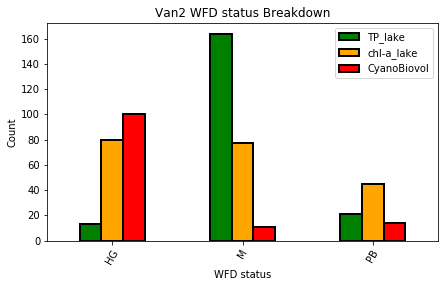

In [116]:
# How unbalanced are the classes? Very!

from collections import OrderedDict

# Color mapping
colors = OrderedDict({1: 'green', 2: 'orange', 3: 'red'})
status_mapping = OrderedDict({1: 'HG', 2: 'M', 3: 'PB'})

# Value counts of target
label_counts = pd.DataFrame()
for var in WFD_class_dict.keys():
    label_counts['%s'%var] = monthly_df['status_%s'%var].value_counts().sort_index()

# Bar plot of occurrences of each label
label_counts.plot.bar(figsize = (7, 4), 
                      color = colors.values(),
                      edgecolor = 'k', linewidth = 2)

# Formatting
plt.xlabel('WFD status'); plt.ylabel('Count'); 
plt.xticks([x - 1 for x in status_mapping.keys()], 
           list(status_mapping.values()), rotation = 60)
plt.title('%s WFD status Breakdown'%basin);

Van1: Very unbalanced. Almost no PB obs for any variables:
- TP split between HG and M (M about 25% higher than HG), tiny bit in PB
- Cyano all HG
- Chl-a mostly HG, little bit in M

Van2: Unbalanced for TP and cyano, chl-a is pretty balanced:
- Almost all TP is M, small HG & PB
- Most cyano is HG, but some M and PB
- chl-a fairly balanced (PB slightly smaller than others)

# Time series plots of monthly data and write output to csv

In [117]:
# Output to csv
monthly_df.to_csv(os.path.join(out_file,'Vansjø_monthly_data_%s.csv' %basin), index_label='Date')

In [118]:
monthly_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pptn,462.0,76.661995,45.278076,0.672300,43.657425,69.495204,103.358857,299.049098
Temp,462.0,5.726480,7.502281,-12.411057,-0.234401,5.286621,12.211478,19.930341
Wind_speed,462.0,3.487214,0.644315,0.200000,3.103253,3.508333,3.895776,5.748387
PET,462.0,47.862841,46.008913,0.000000,3.430929,33.588144,91.305068,143.746935
Q,364.0,5.124776,4.518371,0.082500,1.690943,3.977243,7.125119,34.031467
TP_catch,391.0,81.162981,71.385602,18.000000,38.600000,55.333333,100.628571,646.000000
chl-a_lake,202.0,14.241637,7.982407,1.100000,8.125000,12.550000,18.762500,44.000000
TP_lake,198.0,29.987632,8.208338,11.250000,24.537500,29.404167,33.787500,70.000000
colour_lake,245.0,50.062789,20.885236,10.000000,30.500000,52.000000,65.000000,98.000000
PTI,76.0,2.672643,0.184479,2.319005,2.528540,2.664436,2.803395,3.132615


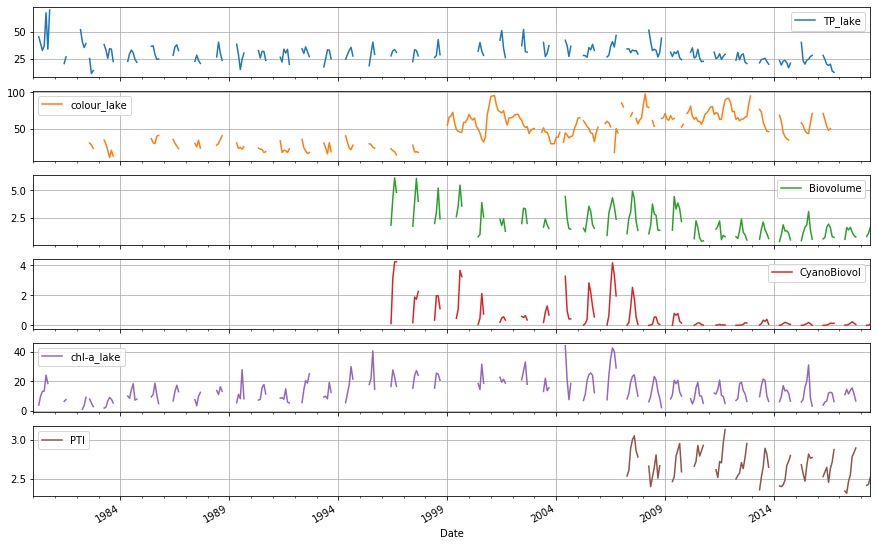

In [38]:
monthly_df[['TP_lake','colour_lake','Biovolume','CyanoBiovol','chl-a_lake','PTI']].plot(subplots=True, grid=True, figsize=(15,10));

In [39]:
monthly_df_slice = monthly_df[['TP_lake','colour_lake','Biovolume','CyanoBiovol','chl-a_lake','PTI']]
monthly_df_slice.head()

,TP_lake,colour_lake,Biovolume,CyanoBiovol,chl-a_lake,PTI
Date,,,,,,
1980-01-31,NaN,NaN,NaN,NaN,NaN,NaN
1980-02-29,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-31,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-30,45.250000,NaN,NaN,NaN,3.971429,NaN
1980-05-31,38.857143,NaN,NaN,NaN,9.948810,NaN


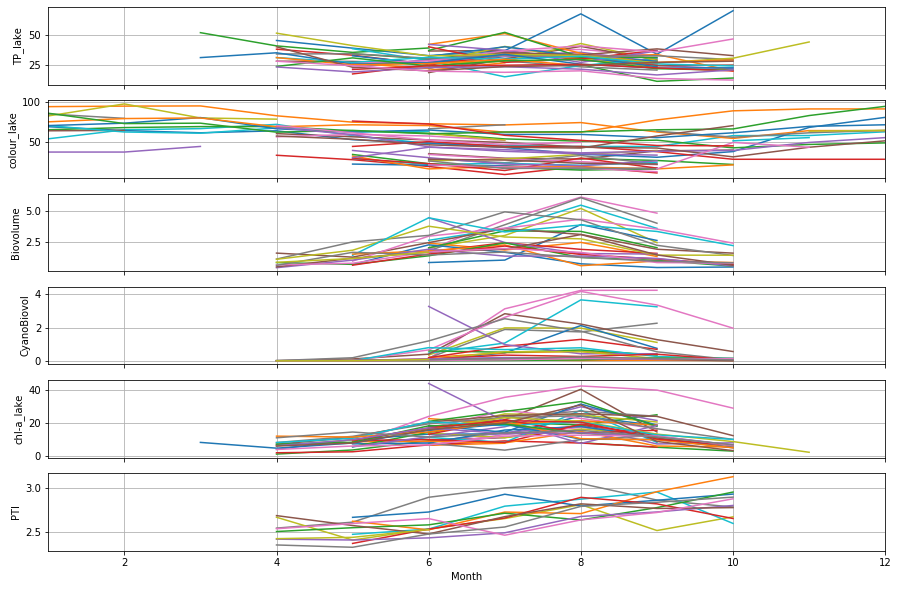

In [88]:
fig, axs = plt.subplots(len(monthly_df_slice.columns), sharex=True, sharey=False, figsize=(15,10))

for group in monthly_df_slice.groupby(monthly_df_slice.index.year):
    year = group[0]
    year_df = group[1]
    year_df = year_df.set_index(year_df.index.month)
    year_df.rename_axis("Month", axis='index', inplace=True)
    
    for i, var in enumerate(year_df.columns):
        year_df[var].plot(ax=axs[i])

for i, var in enumerate(year_df.columns):
    axs[i].set_ylabel(var)
    axs[i].grid(b=True, axis='both')
        
    

In [98]:
daily_df.head()

,Pptn,Temp,Wind_speed,PET,Q,TP_catch,chl-a_lake,TP_lake,colour_lake,PTI,...,Wind_under_Q0.1,Wind_under_Q0.2,Wind_under_Q0.3,Wind_under_Q0.4,Wind_under_Q0.5,Wind_over_Q0.5,Wind_over_Q0.6,Wind_over_Q0.7,Wind_over_Q0.8,Wind_over_Q0.9
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-01,0.000000,-6.478373,2.9,0.0,4.252,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,False,False,False,False,False
1980-01-02,0.000000,-10.410182,3.1,0.0,5.544,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,False,False,False,False,False
1980-01-03,0.000000,-15.997355,1.5,0.0,8.203,NaN,NaN,NaN,NaN,NaN,...,False,True,True,True,True,False,False,False,False,False
1980-01-04,2.693679,-14.694798,1.7,0.0,10.461,NaN,NaN,NaN,NaN,NaN,...,False,True,True,True,True,False,False,False,False,False
1980-01-05,3.016553,-5.953704,1.5,0.0,10.239,NaN,NaN,NaN,NaN,NaN,...,False,True,True,True,True,False,False,False,False,False


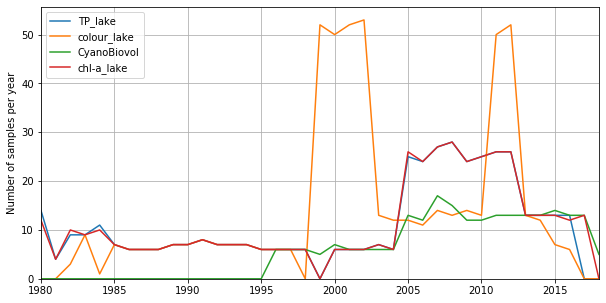

In [103]:
count_df = pd.DataFrame()
target_vars = ['TP_lake','colour_lake','CyanoBiovol','chl-a_lake']
for group in daily_df[target_vars].groupby(daily_df.index.year):
    year = group[0]
    year_df = group[1]
    count_df[year] = year_df.count()

count_df.transpose().plot(figsize=(10,5), grid=True)
plt.ylabel('Number of samples per year')
plt.ylim(ymin=0);

Note that the number of samples per month was low until 2005, so the monthly and seasonal means based on them are much less accurate. Much more intense sampling from 2005 until 2012. Any way of giving these seasons higher weight when fitting the BN I wonder?

As a result of this, the apparently high monthly mean chl-a in 2004, which is a real outlier, looks a bit suspicious as it's only based on 3 data points. Compared to around 8 in 2005, maybe more. **Would be good to also look at number of samples per season per year.**

The imbalance in the number of samples per year for lake colour is particularly massive, due partly to the patching of the two different data sources (MOVAR vs. NIVA). Apparent trends over time could easily be due to changes in sampling frequency.